In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append('../')

from R.models import *
from R.data import *
from R.paths import *

# Scale dependence

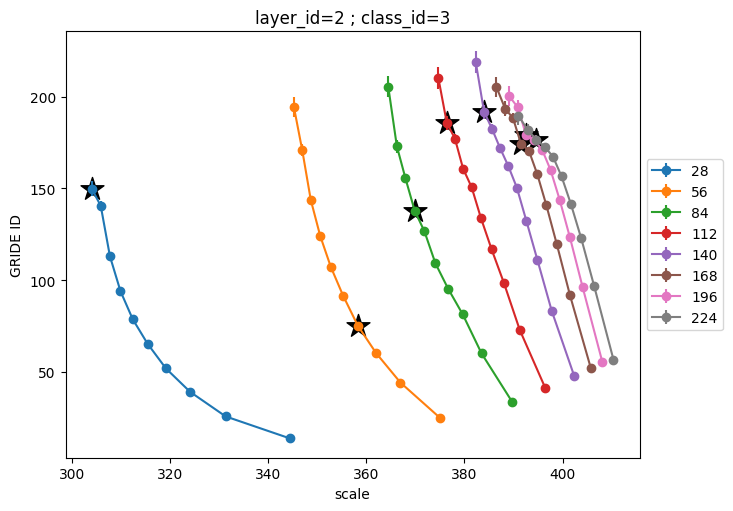

In [21]:
model_id = 0
model_name,W_model = model_list[model_id]
layer_names = layers_dict[model_name][:] 
class_list = list(class_dict.keys())[:]

layer_ids = [2]
class_ids = [3]
crop_sizes = 28 * np.arange(1,8+1,dtype=int)

fi,axs = plt.subplots(1)
for index_l,layer_id in enumerate(layer_ids):
  for index_c,class_id in enumerate(class_ids):
    for index_crop,crop_size in enumerate(crop_sizes):
      layer_name = layer_names[layer_id]
      key = class_list[class_id]
      resultsfolder = makefolder(base=f'results/gride/',
                            create_folder=False,
                            crop_size=crop_size,
                            key=key,
                            layer_id=layer_id,
                            )
      filename='gride.txt'
      (ids_gride,ids_err_gride,rs_gride) = np.loadtxt(resultsfolder+filename,unpack=True)
      axs.errorbar(rs_gride,ids_gride,ids_err_gride,fmt='o-',label=f'{crop_size}')
      
      # selected_scale_id = np.argmax(ids_gride)
      # axs.scatter(rs_gride[selected_scale_id],
      #             ids_gride[selected_scale_id],
      #             marker='*',
      #             color='black',
      #             s=300)
      
      selected_scale_id = np.argmin(np.abs(np.diff(ids_gride)))
      axs.scatter(rs_gride[selected_scale_id],
                  ids_gride[selected_scale_id],
                  marker='*',
                  color='black',
                  s=300)

box = axs.get_position()
axs.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.xlabel(f'scale')
plt.ylabel(f'GRIDE ID')
plt.title(f'{layer_id=} ; {class_id=}')
plt.show()

# Crop size dependence

model_name='resnet18'


FileNotFoundError: results/gride/crop_size_28/key_vizsla/layer_id_5/gride.txt not found.

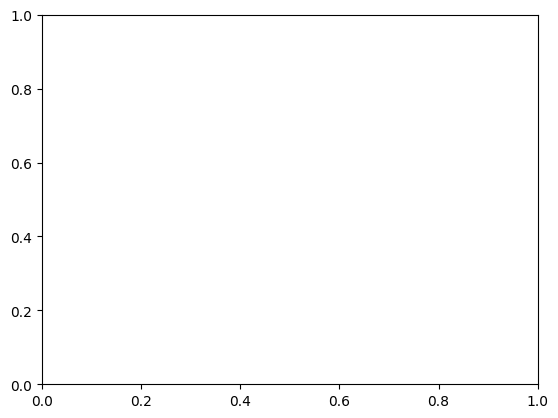

In [41]:
model_id = 0
model_name,W_model = model_list[model_id]
print(f'{model_name=}')
layer_names = layers_dict[model_name][:] 
class_list = list(class_dict.keys())[:]

layer_ids = [0,1,2,3,4,5,6]
class_ids = [0,1,2,3,4,5,6]
crop_sizes = 28 * np.arange(1,8+1,dtype=int)

IDs = np.zeros(shape=(len(layer_ids),
                      len(class_ids),
                      len(crop_sizes))
                      )
fi,axs = plt.subplots(1)
for index_l,layer_id in enumerate(layer_ids):
  for index_c,class_id in enumerate(class_ids):
    for index_crop,crop_size in enumerate(crop_sizes):
      layer_name = layer_names[layer_id]
      key = class_list[class_id]
      resultsfolder = makefolder(base=f'results/gride/',
                            create_folder=False,
                            crop_size=crop_size,
                            key=key,
                            layer_id=layer_id,
                            )
      filename='gride.txt'
      (ids_gride,ids_err_gride,rs_gride) = np.loadtxt(resultsfolder+filename,unpack=True)
      selected_scale_id = np.argmin(np.abs(np.diff(ids_gride)))
      selected_scale_id = 3
      IDs[index_l,index_c,index_crop] = ids_gride[selected_scale_id]

mean_IDs = np.mean(IDs,axis=1)
std_IDs = np.std(IDs,axis=1)
for layer_index,layer_id in enumerate(layer_ids):
  axs.errorbar(crop_sizes,
               mean_IDs[layer_index,:],
               std_IDs[layer_index,:],
               fmt='o-',
               label=f'{layer_id}'
               )      


box = axs.get_position()
axs.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.xlabel(f'scale')
plt.ylabel(f'GRIDE ID')
plt.title(f'{layer_id=} ; {class_id=}')
plt.show()